In [1]:
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras import optimizers
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
from keras.datasets import cifar10
from matplotlib import pyplot as plt
from scipy.misc import toimage

Using TensorFlow backend.


In [2]:
#Load Data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize Inputs From 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# One Hot Encoded Outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [3]:
def AdamExperiment(lrate,beta1,beta2,epsilonvalue,decayvalue,epochs,X_train,y_train,X_test,y_test):
    
    training_accuracy = []
    testing_accuracy = []
    training_loss = []
    testing_loss = []
    
    #Model
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), activation='relu', padding='same'))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))

    #Adagrad Tuning
    adam = optimizers.Adam(lr=lrate, beta_1=beta1, beta_2=beta2, epsilon=epsilonvalue, decay=decayvalue)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    #Training and Fitting
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
    scores = model.evaluate(X_test, y_test, verbose=0)
    acc = print("Accuracy: %.2f%%" % (scores[1]*100))
    training_accuracy.append(history.history['acc'])
    testing_accuracy.append(history.history['val_acc'])
    training_loss.append(history.history['loss'])
    testing_loss.append(history.history['val_loss'])
    
    return training_accuracy,testing_accuracy,training_loss,testing_loss


In [4]:
tr_acc_main = []
ts_acc_main = []
tr_ls_main = []
ts_ls_main = []
learningrates = [0.001,0.0005,0.0001,0.00005]
beta1 = 0.9
beta2 = 0.999
epsilonvalue = 1e-7
decayvalue = 0
epochs = 30

for lrate in learningrates:
    
    tr_acc,ts_acc,tr_ls,ts_ls = AdamExperiment(lrate,beta1,beta2,epsilonvalue,decayvalue,epochs,X_train,y_train,X_test,y_test)
    tr_acc_main.append(tr_acc)
    ts_acc_main.append(ts_acc)
    tr_ls_main.append(tr_ls)
    ts_ls_main.append(ts_ls)    

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 14s - loss: 1.6107 - acc: 0.3992 - val_loss: 1.3560 - val_acc: 0.5050
Epoch 2/30
50000/50000 [==============================] - 12s - loss: 1.2050 - acc: 0.5674 - val_loss: 1.1053 - val_acc: 0.6071
Epoch 3/30
50000/50000 [==============================] - 12s - loss: 1.0414 - acc: 0.6302 - val_loss: 0.9415 - val_acc: 0.6641
Epoch 4/30
50000/50000 [==============================] - 12s - loss: 0.9444 - acc: 0.6667 - val_loss: 0.8488 - val_acc: 0.7020
Epoch 5/30
50000/50000 [==============================] - 12s - loss: 0.8698 - acc: 0.6938 - val_loss: 0.8381 - val_acc: 0.7063
Epoch 6/30
50000/50000 [==============================] - 12s - loss: 0.8167 - acc: 0.7113 - val_loss: 0.7993 - val_acc: 0.7234
Epoch 7/30
50000/50000 [==============================] - 12s - loss: 0.7720 - acc: 0.7287 - val_loss: 0.8048 - val_acc: 0.7201
Epoch 8/30
50000/50000 [==============================

50000/50000 [==============================] - 12s - loss: 1.2413 - acc: 0.5533 - val_loss: 1.1669 - val_acc: 0.5935
Epoch 4/30
50000/50000 [==============================] - 12s - loss: 1.1138 - acc: 0.6017 - val_loss: 1.0494 - val_acc: 0.6268
Epoch 5/30
50000/50000 [==============================] - 12s - loss: 1.0187 - acc: 0.6403 - val_loss: 0.9719 - val_acc: 0.6611
Epoch 6/30
50000/50000 [==============================] - 12s - loss: 0.9359 - acc: 0.6698 - val_loss: 0.8987 - val_acc: 0.6829
Epoch 7/30
50000/50000 [==============================] - 12s - loss: 0.8640 - acc: 0.6957 - val_loss: 0.8703 - val_acc: 0.6940
Epoch 8/30
50000/50000 [==============================] - 12s - loss: 0.8020 - acc: 0.7201 - val_loss: 0.7980 - val_acc: 0.7172
Epoch 9/30
50000/50000 [==============================] - 12s - loss: 0.7448 - acc: 0.7389 - val_loss: 0.8288 - val_acc: 0.7053
Epoch 10/30
50000/50000 [==============================] - 12s - loss: 0.6883 - acc: 0.7588 - val_loss: 0.7604 - va

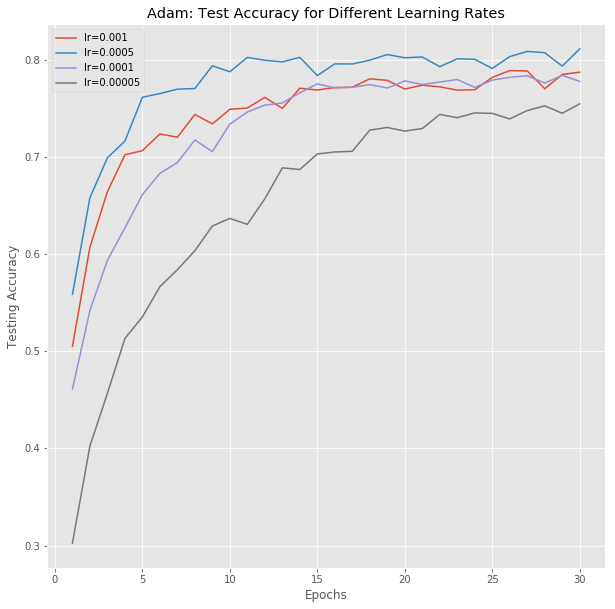

In [6]:
#Plotting Testing Accuracy for different Learning Rates
num = []
for i in range(30):
    num.append(i+1)
    
num = np.asarray(num)

import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')


plt.figure(figsize=(10,10))
plt.title("Adam: Test Accuracy for Different Learning Rates")
plt.xlabel("Epochs")
plt.ylabel("Testing Accuracy")
plt.plot(num,np.array(ts_acc_main[0]).T,mfc='b',label="lr=0.001")
plt.plot(num,np.array(ts_acc_main[1]).T,mfc='b',label="lr=0.0005")
plt.plot(num,np.array(ts_acc_main[2]).T,mfc='b',label="lr=0.0001")
plt.plot(num,np.array(ts_acc_main[3]).T,mfc='b',label="lr=0.00005")
plt.legend(loc="best")

plt.show()

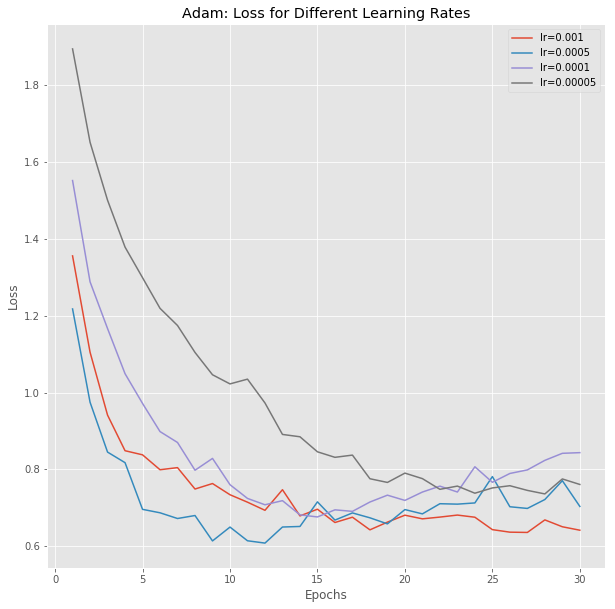

In [7]:
#Plotting Testing Loss for Different Learning Rates

plt.style.use('ggplot')
plt.figure(figsize=(10,10))
plt.title("Adam: Loss for Different Learning Rates")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(num,np.array(ts_ls_main[0]).T,mfc='b',label="lr=0.001")
plt.plot(num,np.array(ts_ls_main[1]).T,mfc='b',label="lr=0.0005")
plt.plot(num,np.array(ts_ls_main[2]).T,mfc='b',label="lr=0.0001")
plt.plot(num,np.array(ts_ls_main[3]).T,mfc='b',label="lr=0.00005")
plt.legend(loc="best")

plt.show()

In [14]:
tr_acc_main1 = []
ts_acc_main1 = []
tr_ls_main1 = []
ts_ls_main1 = []
learningrates = [0.0001]
beta1 = 0.9
beta2 = 0.999
epsilonvalue = 1e-7
decayvalue = 0.0001
epochs = 30

for lrate in learningrates:
    
    tr_acc,ts_acc,tr_ls,ts_ls = AdamExperiment(lrate,beta1,beta2,epsilonvalue,decayvalue,epochs,X_train,y_train,X_test,y_test)
    tr_acc_main1.append(tr_acc)
    ts_acc_main1.append(ts_acc)
    tr_ls_main1.append(tr_ls)
    ts_ls_main1.append(ts_ls) 

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 13s - loss: 1.7698 - acc: 0.3470 - val_loss: 1.5407 - val_acc: 0.4480
Epoch 2/30
50000/50000 [==============================] - 12s - loss: 1.4196 - acc: 0.4823 - val_loss: 1.3385 - val_acc: 0.5330
Epoch 3/30
50000/50000 [==============================] - 12s - loss: 1.2685 - acc: 0.5437 - val_loss: 1.2199 - val_acc: 0.5776
Epoch 4/30
50000/50000 [==============================] - 12s - loss: 1.1588 - acc: 0.5856 - val_loss: 1.1404 - val_acc: 0.6026
Epoch 5/30
50000/50000 [==============================] - 12s - loss: 1.0743 - acc: 0.6179 - val_loss: 1.0319 - val_acc: 0.6360
Epoch 6/30
50000/50000 [==============================] - 12s - loss: 1.0090 - acc: 0.6413 - val_loss: 0.9874 - val_acc: 0.6534
Epoch 7/30
50000/50000 [==============================] - 12s - loss: 0.9619 - acc: 0.6606 - val_loss: 0.9464 - val_acc: 0.6709
Epoch 8/30
50000/50000 [==============================

In [16]:
tr_acc_main2 = []
ts_acc_main2 = []
tr_ls_main2 = []
ts_ls_main2 = []
learningrates = [0.0001]
beta1 = 0.9
beta2 = 0.999
epsilonvalue = 1e-7
decayvalue = 0.00005
epochs = 30

for lrate in learningrates:
    
    tr_acc,ts_acc,tr_ls,ts_ls = AdamExperiment(lrate,beta1,beta2,epsilonvalue,decayvalue,epochs,X_train,y_train,X_test,y_test)
    tr_acc_main2.append(tr_acc)
    ts_acc_main2.append(ts_acc)
    tr_ls_main2.append(tr_ls)
    ts_ls_main2.append(ts_ls) 

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 13s - loss: 1.7650 - acc: 0.3502 - val_loss: 1.5246 - val_acc: 0.4567
Epoch 2/30
50000/50000 [==============================] - 12s - loss: 1.4074 - acc: 0.4899 - val_loss: 1.2869 - val_acc: 0.5411
Epoch 3/30
50000/50000 [==============================] - 12s - loss: 1.2595 - acc: 0.5463 - val_loss: 1.1804 - val_acc: 0.5843
Epoch 4/30
50000/50000 [==============================] - 12s - loss: 1.1463 - acc: 0.5937 - val_loss: 1.0852 - val_acc: 0.6079
Epoch 5/30
50000/50000 [==============================] - 12s - loss: 1.0536 - acc: 0.6261 - val_loss: 1.0115 - val_acc: 0.6435
Epoch 6/30
50000/50000 [==============================] - 12s - loss: 0.9850 - acc: 0.6522 - val_loss: 0.9700 - val_acc: 0.6603
Epoch 7/30
50000/50000 [==============================] - 12s - loss: 0.9248 - acc: 0.6726 - val_loss: 0.9257 - val_acc: 0.6726
Epoch 8/30
50000/50000 [==============================

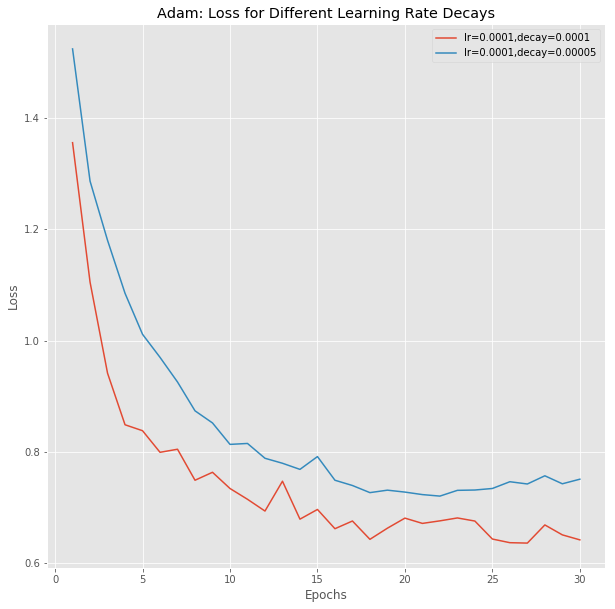

In [19]:
plt.style.use('ggplot')
plt.figure(figsize=(10,10))
plt.title("Adam: Loss for Different Learning Rate Decays")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(num,np.array(ts_ls_main[0]).T,mfc='b',label="lr=0.0001,decay=0.0001")
plt.plot(num,np.array(ts_ls_main2[0]).T,mfc='b',label="lr=0.0001,decay=0.00005")
plt.legend(loc="best")

In [20]:
beta1values = [0.8,0.9,0.95,0.975,0.98,0.99]

tr_acc_main3 = []
ts_acc_main3 = []
tr_ls_main3 = []
ts_ls_main3 = []
learningrates = 0.0001
beta2 = 0.999
epsilonvalue = 1e-7
decayvalue = 0.0001
epochs = 30

for beta1 in beta1values:
    
    tr_acc,ts_acc,tr_ls,ts_ls = AdamExperiment(lrate,beta1,beta2,epsilonvalue,decayvalue,epochs,X_train,y_train,X_test,y_test)
    tr_acc_main3.append(tr_acc)
    ts_acc_main3.append(ts_acc)
    tr_ls_main3.append(tr_ls)
    ts_ls_main3.append(ts_ls)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 13s - loss: 1.7593 - acc: 0.3500 - val_loss: 1.7885 - val_acc: 0.3508
Epoch 2/30
50000/50000 [==============================] - 12s - loss: 1.4238 - acc: 0.4823 - val_loss: 1.3857 - val_acc: 0.5044
Epoch 3/30
50000/50000 [==============================] - 12s - loss: 1.2792 - acc: 0.5393 - val_loss: 1.2791 - val_acc: 0.5447
Epoch 4/30
50000/50000 [==============================] - 12s - loss: 1.1746 - acc: 0.5798 - val_loss: 1.1977 - val_acc: 0.5821
Epoch 5/30
50000/50000 [==============================] - 12s - loss: 1.0954 - acc: 0.6101 - val_loss: 1.0934 - val_acc: 0.6174
Epoch 6/30
50000/50000 [==============================] - 12s - loss: 1.0312 - acc: 0.6354 - val_loss: 1.0583 - val_acc: 0.6253
Epoch 7/30
50000/50000 [==============================] - 12s - loss: 0.9741 - acc: 0.6584 - val_loss: 0.9739 - val_acc: 0.6585
Epoch 8/30
50000/50000 [==============================

50000/50000 [==============================] - 13s - loss: 1.3072 - acc: 0.5282 - val_loss: 1.2757 - val_acc: 0.5597
Epoch 4/30
50000/50000 [==============================] - 13s - loss: 1.2040 - acc: 0.5695 - val_loss: 1.1685 - val_acc: 0.5869
Epoch 5/30
50000/50000 [==============================] - 13s - loss: 1.1184 - acc: 0.6009 - val_loss: 1.1087 - val_acc: 0.6114
Epoch 6/30
50000/50000 [==============================] - 13s - loss: 1.0540 - acc: 0.6251 - val_loss: 1.0296 - val_acc: 0.6387
Epoch 7/30
50000/50000 [==============================] - 13s - loss: 0.9990 - acc: 0.6467 - val_loss: 1.0189 - val_acc: 0.6372
Epoch 8/30
50000/50000 [==============================] - 13s - loss: 0.9563 - acc: 0.6627 - val_loss: 0.9518 - val_acc: 0.6665
Epoch 9/30
50000/50000 [==============================] - 13s - loss: 0.9109 - acc: 0.6792 - val_loss: 0.9361 - val_acc: 0.6707
Epoch 10/30
50000/50000 [==============================] - 13s - loss: 0.8736 - acc: 0.6940 - val_loss: 0.9078 - va

50000/50000 [==============================] - 13s - loss: 1.0903 - acc: 0.6117 - val_loss: 1.0388 - val_acc: 0.6335
Epoch 6/30
50000/50000 [==============================] - 13s - loss: 1.0278 - acc: 0.6342 - val_loss: 0.9935 - val_acc: 0.6466
Epoch 7/30
50000/50000 [==============================] - 13s - loss: 0.9752 - acc: 0.6533 - val_loss: 0.9639 - val_acc: 0.6594
Epoch 8/30
50000/50000 [==============================] - 13s - loss: 0.9317 - acc: 0.6700 - val_loss: 0.9229 - val_acc: 0.6743
Epoch 9/30
50000/50000 [==============================] - 13s - loss: 0.8900 - acc: 0.6862 - val_loss: 0.8885 - val_acc: 0.6872
Epoch 10/30
50000/50000 [==============================] - 13s - loss: 0.8604 - acc: 0.6978 - val_loss: 0.8926 - val_acc: 0.6847
Epoch 11/30
50000/50000 [==============================] - 13s - loss: 0.8277 - acc: 0.7078 - val_loss: 0.8569 - val_acc: 0.6983
Epoch 12/30
50000/50000 [==============================] - 13s - loss: 0.7979 - acc: 0.7186 - val_loss: 0.8283 - 

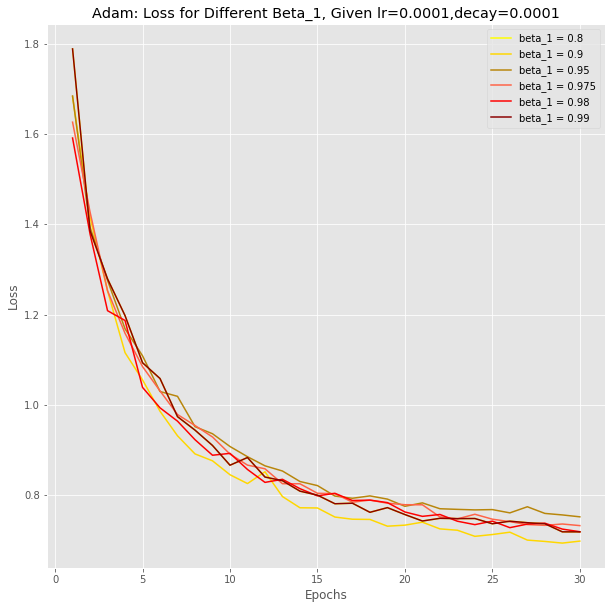

In [26]:
plt.style.use('ggplot')
plt.figure(figsize=(10,10))
plt.title("Adam: Loss for Different Beta_1, Given lr=0.0001,decay=0.0001")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(num,np.array(ts_ls_main3[0]).T,mfc='b',label="beta_1 = 0.8",color='yellow')
plt.plot(num,np.array(ts_ls_main3[1]).T,mfc='b',label="beta_1 = 0.9",color='gold')
plt.plot(num,np.array(ts_ls_main3[2]).T,mfc='b',label="beta_1 = 0.95",color='darkgoldenrod')
plt.plot(num,np.array(ts_ls_main3[3]).T,mfc='b',label="beta_1 = 0.975",color='tomato')
plt.plot(num,np.array(ts_ls_main3[4]).T,mfc='b',label="beta_1 = 0.98",color='r')
plt.plot(num,np.array(ts_ls_main3[0]).T,mfc='b',label="beta_1 = 0.99",color='darkred')


plt.legend(loc="best")
plt.show()

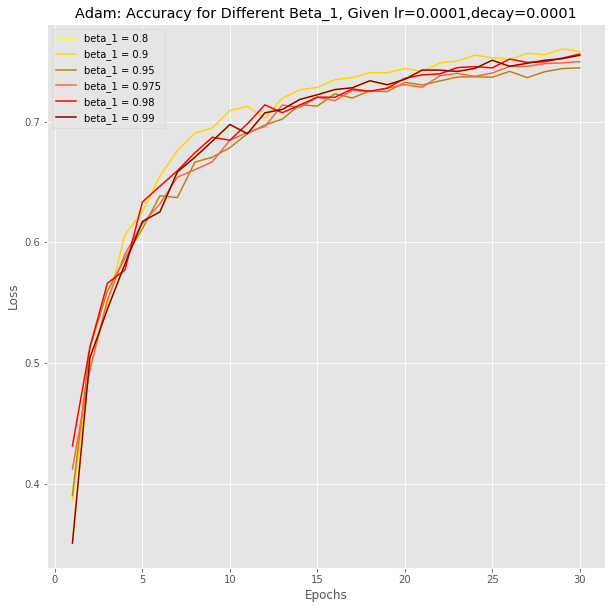

In [46]:
num = []
for i in range(30):
    num.append(i+1)
plt.style.use('ggplot')
plt.figure(figsize=(10,10))
plt.title("Adam: Accuracy for Different Beta_1, Given lr=0.0001,decay=0.0001")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(num,np.array(ts_acc_main3[0]).T,mfc='b',label="beta_1 = 0.8",color='yellow')
plt.plot(num,np.array(ts_acc_main3[1]).T,mfc='b',label="beta_1 = 0.9",color='gold')
plt.plot(num,np.array(ts_acc_main3[2]).T,mfc='b',label="beta_1 = 0.95",color='darkgoldenrod')
plt.plot(num,np.array(ts_acc_main3[3]).T,mfc='b',label="beta_1 = 0.975",color='tomato')
plt.plot(num,np.array(ts_acc_main3[4]).T,mfc='b',label="beta_1 = 0.98",color='r')
plt.plot(num,np.array(ts_acc_main3[0]).T,mfc='b',label="beta_1 = 0.99",color='darkred')


plt.legend(loc="best")
plt.show()

In [28]:

beta1values = [0.9,0.98,0.99]
beta2values = [0.98,0.995,0.999]

tr_acc_main4 = []
ts_acc_main4 = []
tr_ls_main4 = []
ts_ls_main4 = []
learningrates = 0.0001
epsilonvalue = 1e-7
decayvalue = 0.0001
epochs = 40

for beta1 in beta1values:
    for beta2 in beta2values:
    
        tr_acc,ts_acc,tr_ls,ts_ls = AdamExperiment(lrate,beta1,beta2,epsilonvalue,decayvalue,epochs,X_train,y_train,X_test,y_test)
        tr_acc_main4.append(tr_acc)
        ts_acc_main4.append(ts_acc)
        tr_ls_main4.append(tr_ls)
        ts_ls_main4.append(ts_ls)


Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 13s - loss: 1.8121 - acc: 0.3336 - val_loss: 1.7376 - val_acc: 0.3757
Epoch 2/40
50000/50000 [==============================] - 13s - loss: 1.4937 - acc: 0.4562 - val_loss: 1.4961 - val_acc: 0.4552
Epoch 3/40
50000/50000 [==============================] - 13s - loss: 1.3472 - acc: 0.5115 - val_loss: 1.3573 - val_acc: 0.5222
Epoch 4/40
50000/50000 [==============================] - 13s - loss: 1.2366 - acc: 0.5549 - val_loss: 1.2503 - val_acc: 0.5556
Epoch 5/40
50000/50000 [==============================] - 13s - loss: 1.1439 - acc: 0.5893 - val_loss: 1.1376 - val_acc: 0.5972
Epoch 6/40
50000/50000 [==============================] - 13s - loss: 1.0701 - acc: 0.6191 - val_loss: 1.0468 - val_acc: 0.6338
Epoch 7/40
50000/50000 [==============================] - 13s - loss: 1.0130 - acc: 0.6408 - val_loss: 1.0112 - val_acc: 0.6411
Epoch 8/40
50000/50000 [==============================

50000/50000 [==============================] - 13s - loss: 0.6080 - acc: 0.7877 - val_loss: 0.7346 - val_acc: 0.7447
Epoch 24/40
50000/50000 [==============================] - 13s - loss: 0.5990 - acc: 0.7901 - val_loss: 0.7393 - val_acc: 0.7438
Epoch 25/40
50000/50000 [==============================] - 13s - loss: 0.5839 - acc: 0.7958 - val_loss: 0.7414 - val_acc: 0.7431
Epoch 26/40
50000/50000 [==============================] - 13s - loss: 0.5728 - acc: 0.7985 - val_loss: 0.7231 - val_acc: 0.7494
Epoch 27/40
50000/50000 [==============================] - 13s - loss: 0.5579 - acc: 0.8048 - val_loss: 0.7286 - val_acc: 0.7485
Epoch 28/40
50000/50000 [==============================] - 13s - loss: 0.5517 - acc: 0.8047 - val_loss: 0.7412 - val_acc: 0.7459
Epoch 29/40
50000/50000 [==============================] - 13s - loss: 0.5389 - acc: 0.8104 - val_loss: 0.7179 - val_acc: 0.7533
Epoch 30/40
50000/50000 [==============================] - 13s - loss: 0.5231 - acc: 0.8139 - val_loss: 0.721

50000/50000 [==============================] - 13s - loss: 1.1572 - acc: 0.5864 - val_loss: 1.1134 - val_acc: 0.6045
Epoch 6/40
50000/50000 [==============================] - 13s - loss: 1.0860 - acc: 0.6145 - val_loss: 1.0623 - val_acc: 0.6229
Epoch 7/40
50000/50000 [==============================] - 13s - loss: 1.0307 - acc: 0.6357 - val_loss: 1.0120 - val_acc: 0.6402
Epoch 8/40
50000/50000 [==============================] - 13s - loss: 0.9880 - acc: 0.6495 - val_loss: 0.9721 - val_acc: 0.6494
Epoch 9/40
50000/50000 [==============================] - 13s - loss: 0.9387 - acc: 0.6691 - val_loss: 0.9461 - val_acc: 0.6707
Epoch 10/40
50000/50000 [==============================] - 13s - loss: 0.9115 - acc: 0.6800 - val_loss: 0.9163 - val_acc: 0.6761
Epoch 11/40
50000/50000 [==============================] - 13s - loss: 0.8773 - acc: 0.6920 - val_loss: 0.8850 - val_acc: 0.6885
Epoch 12/40
50000/50000 [==============================] - 13s - loss: 0.8473 - acc: 0.7041 - val_loss: 0.8733 - 

50000/50000 [==============================] - 13s - loss: 0.5649 - acc: 0.8014 - val_loss: 0.7637 - val_acc: 0.7401
Epoch 29/40
50000/50000 [==============================] - 13s - loss: 0.5514 - acc: 0.8074 - val_loss: 0.7749 - val_acc: 0.7362
Epoch 30/40
50000/50000 [==============================] - 13s - loss: 0.5429 - acc: 0.8088 - val_loss: 0.7950 - val_acc: 0.7309
Epoch 31/40
50000/50000 [==============================] - 13s - loss: 0.5323 - acc: 0.8131 - val_loss: 0.7619 - val_acc: 0.7439
Epoch 32/40
50000/50000 [==============================] - 13s - loss: 0.5217 - acc: 0.8161 - val_loss: 0.7729 - val_acc: 0.7371
Epoch 33/40
50000/50000 [==============================] - 13s - loss: 0.5111 - acc: 0.8202 - val_loss: 0.7718 - val_acc: 0.7395
Epoch 34/40
50000/50000 [==============================] - 13s - loss: 0.5032 - acc: 0.8230 - val_loss: 0.7648 - val_acc: 0.7414
Epoch 35/40
50000/50000 [==============================] - 13s - loss: 0.4923 - acc: 0.8269 - val_loss: 0.768

50000/50000 [==============================] - 13s - loss: 0.9722 - acc: 0.6558 - val_loss: 0.9698 - val_acc: 0.6602
Epoch 11/40
50000/50000 [==============================] - 13s - loss: 0.9404 - acc: 0.6678 - val_loss: 0.9684 - val_acc: 0.6591
Epoch 12/40
50000/50000 [==============================] - 13s - loss: 0.9162 - acc: 0.6762 - val_loss: 0.9235 - val_acc: 0.6781
Epoch 13/40
50000/50000 [==============================] - 13s - loss: 0.8919 - acc: 0.6841 - val_loss: 0.9739 - val_acc: 0.6569
Epoch 14/40
50000/50000 [==============================] - 13s - loss: 0.8641 - acc: 0.6956 - val_loss: 0.9110 - val_acc: 0.6820
Epoch 15/40
50000/50000 [==============================] - 13s - loss: 0.8419 - acc: 0.7026 - val_loss: 0.9007 - val_acc: 0.6860
Epoch 16/40
50000/50000 [==============================] - 13s - loss: 0.8248 - acc: 0.7096 - val_loss: 0.8757 - val_acc: 0.6961
Epoch 17/40
50000/50000 [==============================] - 13s - loss: 0.8069 - acc: 0.7161 - val_loss: 0.889

50000/50000 [==============================] - 13s - loss: 0.5149 - acc: 0.8178 - val_loss: 0.7182 - val_acc: 0.7587
Epoch 34/40
50000/50000 [==============================] - 13s - loss: 0.5046 - acc: 0.8207 - val_loss: 0.7300 - val_acc: 0.7548
Epoch 35/40
50000/50000 [==============================] - 13s - loss: 0.4950 - acc: 0.8252 - val_loss: 0.7086 - val_acc: 0.7632
Epoch 36/40
50000/50000 [==============================] - 13s - loss: 0.4848 - acc: 0.8285 - val_loss: 0.7293 - val_acc: 0.7580
Epoch 37/40
50000/50000 [==============================] - 13s - loss: 0.4765 - acc: 0.8320 - val_loss: 0.7104 - val_acc: 0.7641
Epoch 38/40
50000/50000 [==============================] - 13s - loss: 0.4679 - acc: 0.8351 - val_loss: 0.7179 - val_acc: 0.7587
Epoch 39/40
50000/50000 [==============================] - 13s - loss: 0.4608 - acc: 0.8369 - val_loss: 0.7052 - val_acc: 0.7644
Epoch 40/40
50000/50000 [==============================] - 13s - loss: 0.4517 - acc: 0.8405 - val_loss: 0.702

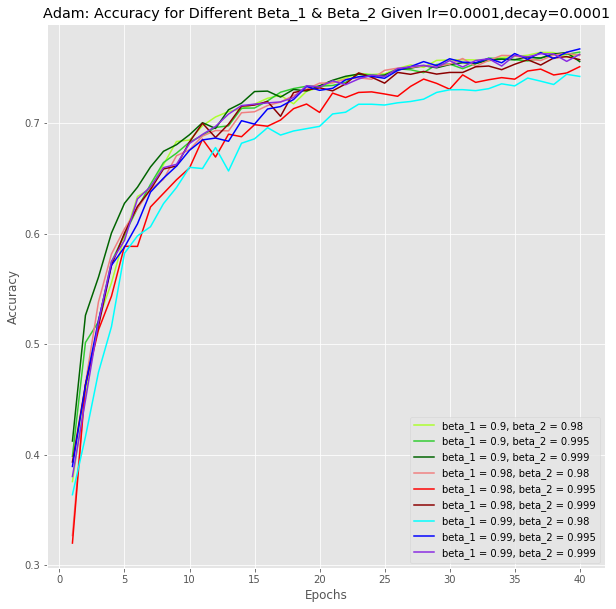

In [34]:
num = []
for i in range(40):
    num.append(i+1)
    
num = np.asarray(num)

plt.style.use('ggplot')
plt.figure(figsize=(10,10))
plt.title("Adam: Accuracy for Different Beta_1 & Beta_2 Given lr=0.0001,decay=0.0001")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(num,np.array(ts_acc_main4[0]).T,mfc='b',label="beta_1 = 0.9, beta_2 = 0.98",color='greenyellow')
plt.plot(num,np.array(ts_acc_main4[1]).T,mfc='b',label="beta_1 = 0.9, beta_2 = 0.995",color='limegreen')
plt.plot(num,np.array(ts_acc_main4[2]).T,mfc='b',label="beta_1 = 0.9, beta_2 = 0.999",color='darkgreen')
plt.plot(num,np.array(ts_acc_main4[3]).T,mfc='b',label="beta_1 = 0.98, beta_2 = 0.98",color='lightcoral')
plt.plot(num,np.array(ts_acc_main4[4]).T,mfc='b',label="beta_1 = 0.98, beta_2 = 0.995",color='r')
plt.plot(num,np.array(ts_acc_main4[5]).T,mfc='b',label="beta_1 = 0.98, beta_2 = 0.999",color='darkred')
plt.plot(num,np.array(ts_acc_main4[6]).T,mfc='b',label="beta_1 = 0.99, beta_2 = 0.98",color='aqua')
plt.plot(num,np.array(ts_acc_main4[7]).T,mfc='b',label="beta_1 = 0.99, beta_2 = 0.995",color='b')
plt.plot(num,np.array(ts_acc_main4[8]).T,mfc='b',label="beta_1 = 0.99, beta_2 = 0.999",color='blueviolet')

plt.legend(loc="best")
plt.show()

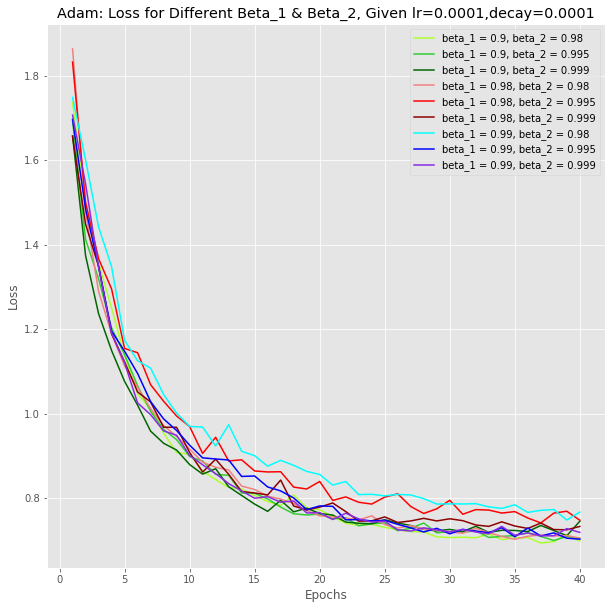

In [33]:
plt.style.use('ggplot')
plt.figure(figsize=(10,10))
plt.title("Adam: Loss for Different Beta_1 & Beta_2, Given lr=0.0001,decay=0.0001")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(num,np.array(ts_ls_main4[0]).T,mfc='b',label="beta_1 = 0.9, beta_2 = 0.98",color='greenyellow')
plt.plot(num,np.array(ts_ls_main4[1]).T,mfc='b',label="beta_1 = 0.9, beta_2 = 0.995",color='limegreen')
plt.plot(num,np.array(ts_ls_main4[2]).T,mfc='b',label="beta_1 = 0.9, beta_2 = 0.999",color='darkgreen')
plt.plot(num,np.array(ts_ls_main4[3]).T,mfc='b',label="beta_1 = 0.98, beta_2 = 0.98",color='lightcoral')
plt.plot(num,np.array(ts_ls_main4[4]).T,mfc='b',label="beta_1 = 0.98, beta_2 = 0.995",color='r')
plt.plot(num,np.array(ts_ls_main4[5]).T,mfc='b',label="beta_1 = 0.98, beta_2 = 0.999",color='darkred')
plt.plot(num,np.array(ts_ls_main4[6]).T,mfc='b',label="beta_1 = 0.99, beta_2 = 0.98",color='aqua')
plt.plot(num,np.array(ts_ls_main4[7]).T,mfc='b',label="beta_1 = 0.99, beta_2 = 0.995",color='b')
plt.plot(num,np.array(ts_ls_main4[8]).T,mfc='b',label="beta_1 = 0.99, beta_2 = 0.999",color='blueviolet')

plt.legend(loc="best")
plt.show()

In [39]:
lrate = 0.0001
epsilonvalue = 1e-7
decayvalue = 0.0002
epochs = 100
beta1 = 0.9
beta2 = 0.98

tr_acc1,ts_acc1,tr_ls1,ts_ls1 = AdamExperiment(lrate,beta1,beta2,epsilonvalue,decayvalue,epochs,X_train,y_train,X_test,y_test)
 



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 14s - loss: 1.8085 - acc: 0.3305 - val_loss: 1.7533 - val_acc: 0.3648
Epoch 2/100
50000/50000 [==============================] - 13s - loss: 1.4986 - acc: 0.4540 - val_loss: 1.5346 - val_acc: 0.4583
Epoch 3/100
50000/50000 [==============================] - 13s - loss: 1.3725 - acc: 0.5026 - val_loss: 1.4191 - val_acc: 0.5036
Epoch 4/100
50000/50000 [==============================] - 13s - loss: 1.2875 - acc: 0.5362 - val_loss: 1.3292 - val_acc: 0.5248
Epoch 5/100
50000/50000 [==============================] - 13s - loss: 1.2174 - acc: 0.5617 - val_loss: 1.2025 - val_acc: 0.5732
Epoch 6/100
50000/50000 [==============================] - 13s - loss: 1.1617 - acc: 0.5859 - val_loss: 1.1562 - val_acc: 0.5913
Epoch 7/100
50000/50000 [==============================] - 13s - loss: 1.1215 - acc: 0.5983 - val_loss: 1.1419 - val_acc: 0.5922
Epoch 8/100
50000/50000 [======================

50000/50000 [==============================] - 13s - loss: 0.6078 - acc: 0.7860 - val_loss: 0.8045 - val_acc: 0.7185
Epoch 64/100
50000/50000 [==============================] - 13s - loss: 0.6017 - acc: 0.7908 - val_loss: 0.8264 - val_acc: 0.7113
Epoch 65/100
50000/50000 [==============================] - 13s - loss: 0.5941 - acc: 0.7918 - val_loss: 0.8185 - val_acc: 0.7150
Epoch 66/100
50000/50000 [==============================] - 13s - loss: 0.5972 - acc: 0.7905 - val_loss: 0.8107 - val_acc: 0.7169
Epoch 67/100
50000/50000 [==============================] - 13s - loss: 0.5953 - acc: 0.7915 - val_loss: 0.8221 - val_acc: 0.7160
Epoch 68/100
50000/50000 [==============================] - 13s - loss: 0.5945 - acc: 0.7921 - val_loss: 0.8100 - val_acc: 0.7175
Epoch 69/100
50000/50000 [==============================] - 13s - loss: 0.5890 - acc: 0.7928 - val_loss: 0.8261 - val_acc: 0.7152
Epoch 70/100
50000/50000 [==============================] - 13s - loss: 0.5825 - acc: 0.7936 - val_loss

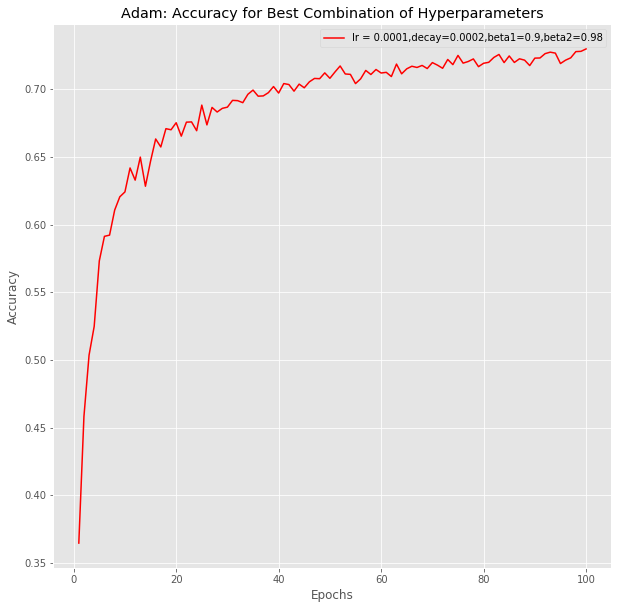

In [44]:
num = []
for i in range(100):
    num.append(i+1)
    
num = np.asarray(num)

plt.style.use('ggplot')
plt.figure(figsize=(10,10))
plt.title("Adam: Accuracy for Best Combination of Hyperparameters")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(num,np.array(ts_acc1).T,mfc='b',label="lr = 0.0001,decay=0.0002,beta1=0.9,beta2=0.98",color='r')
plt.legend(loc="best")
plt.show()

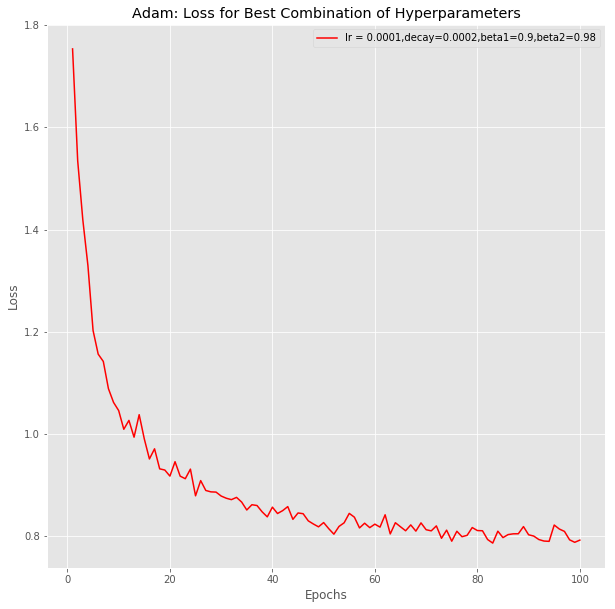

In [43]:
num = []
for i in range(100):
    num.append(i+1)
    
num = np.asarray(num)

plt.style.use('ggplot')
plt.figure(figsize=(10,10))
plt.title("Adam: Loss for Best Combination of Hyperparameters")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(num,np.array(ts_ls1).T,mfc='b',label="lr = 0.0001,decay=0.0002,beta1=0.9,beta2=0.98",color='r')
plt.legend(loc="best")
plt.show()